In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

class Attractor(object):
    " Class Attractor calculates Euler, 2nd and 4th order Runga-Kutta ODEs"
    def __init__(self, s=10, p=28., b=8.0/3.0, start=0.0, end=80.0, points=10000):
        self.params = np.array([s, p, b])
        self.points = points
        self.end = end
        self.start = start
        self.t = np.linspace(self.start, self.end, self.points+1, endpoint=True)
        self.dt = (self.end - self.start) / self.points
        self.solution = None

    def euler(self, nparray=np.array([]), dt=None):
        """Calculates the simplest euler increment.

        @param: nparray: a numpy array containing values [x,y,z]
        @return: a numpy array form of the simplest euler increment
        """
        dt = dt or self.dt
        k1 = [0.0] * 3
        k1[0] = self.params[0] * (nparray[1] - nparray[0])
        k1[1] = nparray[0] * (self.params[1] - nparray[2]) - nparray[1]
        k1[2] = (nparray[0] * nparray[1]) - (self.params[2] * nparray[2])
        
        # change over time
        k1[0] = nparray[0] + (k1[0] * dt)
        k1[1] = nparray[1] + (k1[1] * dt)
        k1[2] = nparray[2] + (k1[2] * dt)

        return np.array(k1)

    def rk2(self, nparray=np.array([])):
        """Calculates the 2nd order Runge-kutta increment.

        @param: nparray:  a numpy array containing values [x,y,z]
        @return: k2, a numpy array form of the 2nd order Runge-kutta increment
        """
        k1 = self.euler(nparray)
        k2 = [0.0] * 3

        # change over time
        k2[0] = nparray[0] + (k1[0] * self.dt / 2)
        k2[1] = nparray[1] + (k1[1] * self.dt / 2)
        k2[2] = nparray[2] + (k1[2] * self.dt / 2)
        return self.euler(np.array(k2), dt=self.dt/2)

    def rk4(self, nparray=np.array([])):
        """Calculates the 4th order Runge-kutta increment.

        @param: nparray:  a numpy array containing values [x,y,z]
        @return: k4, a numpy array form of the 4th order Runge-kutta increment
        """
        k2 = self.rk2(nparray)
        k3 = [0.0] * 3
        k4 = [0.0] * 3

        # change over time
        k3[0] = nparray[0] + k2[0] * self.dt / 2
        k3[1] = nparray[1] + k2[1] * self.dt / 2
        k3[2] = nparray[2] + k2[2] * self.dt / 2
        k3 = self.euler(np.array(k3), dt=self.dt/2)

        # change over time
        k4[0] = nparray[0] + k3[0] * self.dt
        k4[1] = nparray[1] + k3[1] * self.dt
        k4[2] = nparray[2] + k3[2] * self.dt

        return self.euler(np.array(k4))

    def evolve(self, r0=np.array([0.1,0.0,0.0]), order=4):
        """Generates a pandas DataFrame wrt order specified.

        @param: r0:  a numpy array containing values [x0,y0,z0]
        @return: self.solution, a pandas DataFrame object
        """
        result = np.array([0, r0[0], r0[1], r0[2]])
        inc = r0;
        if order == 1:
            for t in self.t:
                inc = self.euler(inc)
                result = np.vstack((result,np.append(t, inc)))
        elif order == 2:
            for t in self.t:
                inc = self.rk2(inc)
                result = np.vstack((result,np.append(t, inc)))
        elif order == 4:
            for t in self.t:
                inc = self.rk4(inc)
                result = np.vstack((result,np.append(t, inc)))
        self.solution = pd.DataFrame(result, columns=['t', 'x', 'y', 'z'])
        return self.solution

    def save(self, filename=None):
        filename = filename or 'solution.csv'
        self.solution.to_csv(filename)

    def plotx(self):
        """Generates 2d plot of x(t)."""
        plot.plot(self.solution['t'], self.solution['x'])
        plot.show()

    def ploty(self):
        """Generates 2d plot of y(t)."""
        plot.plot(self.solution['t'], self.solution['y'])
        plot.show()

    def plotz(self):
        """Generates 2d plot of z(t)."""
        plot.plot(self.solution['t'], self.solution['z'])
        plot.show()
    
    def plotxy(self):
        """Generates 2d plot of x(t)."""
        plot.plot(self.solution['x'], self.solution['y'])
        plot.show()
    
    def plotyz(self):
        """Generates 2d plot of x(t)."""
        plot.plot(self.solution['y'], self.solution['z'])
        plot.show()
    
    def plotzx(self):
        """Generates 2d plot of x(t)."""
        plot.plot(self.solution['z'], self.solution['x'])
        plot.show()

    def plot3d(self):
        """Generates 3d plot of x(t), y(t), z(t)."""
        fig = plot.figure()
        plt = fig.add_subplot(111, projection='3d')
        plt.scatter(
            self.solution['x'], self.solution['y'], self.solution['z'])
        plot.show()


In [115]:
obj.rk2([10,0,30])

array([  9.6353024 ,  -0.08564673,  29.79616161])

In [116]:
obj=Attractor()
obj.rk4([10,0,30])

array([  9.27087354,  -0.18112923,  29.59324259])

In [117]:
obj=Attractor()
obj.evolve([1,0,1], order=4)

,t,x,y,z
0,0.000,1.000000,0.000000,1.000000
1,0.000,0.927163,0.218465,0.986450
2,0.008,0.877312,0.421121,0.974736
3,0.016,0.847495,0.612966,0.964541
4,0.024,0.835378,0.798363,0.955709
5,0.032,0.839148,0.981170,0.948200
6,0.040,0.857439,1.164855,0.942070
7,0.048,0.889265,1.352587,0.937455
8,0.056,0.933968,1.547321,0.934569
9,0.064,0.991175,1.751868,0.933701


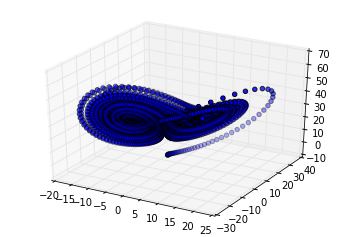

In [112]:
obj.plot3d()